#### packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
import scipy
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:.5f}'.format

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data

In [4]:
df = pd.read_csv('2023_07_27_data_step.csv', encoding='cp949')
df.isnull().sum()

pid              0
majorcat         0
province         0
area             0
sex              0
              ... 
삶의만족도_개인         0
삶의만족도_관계         0
삶의만족도_소속집단       0
종사자수          1235
업무만족도            0
Length: 117, dtype: int64

In [5]:
df_copy = df.copy()

##### 수도권에 취업한 사람 중 비수도권 대학은 없음

In [6]:
비수도권 = df_copy[(df_copy['area']!='서울')&(df_copy['area']!='경기')].copy()

model = sm.Logit.from_formula('''LongWork2 ~ age + C(성별,Treatment("여자")) + C(건강상태) + C(결혼상태)''', 비수도권).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.333990
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 3183
Model:                          Logit   Df Residuals:                     3177
Method:                           MLE   Df Model:                            5
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.1332
Time:                        14:27:33   Log-Likelihood:                -1063.1
converged:                       True   LL-Null:                       -1226.5
Covariance Type:            nonrobust   LLR p-value:                 1.772e-68
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -9.9605      0.828    -12.025      0.000     -11.584      -8.337
C(성별, Treatment("여자"))[T.남자]    -0.1466      0.133     -1.106      0.269      -0.406       0.113
C(건강상태)[T.건강하지않다]               -0.0731      0.180     -0.406      0.685      -0.426       0.280
C(건강상태)[T.보통이다]                 -0.2885      0.139     -2.082      0.037      -0.560      -0.017
C(결혼상태)[T.미혼]                   -1.5108      0.244     -6.199      0.000      -1.988      -1.033
age                              0.3638      0.029     12.575      0.000       0.307       0.420
================================================================================================
"""

In [7]:
print(f'모델 AIC:{model.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:2138.179205560734




,OR,Lower CI,Upper CI
Intercept,0.00005,0.00001,0.00024
"C(성별, Treatment(""여자""))[T.남자]",0.86366,0.66613,1.11977
C(건강상태)[T.건강하지않다],0.92954,0.65313,1.32292
C(건강상태)[T.보통이다],0.74937,0.57114,0.98323
C(결혼상태)[T.미혼],0.22073,0.13691,0.35588
age,1.43874,1.35944,1.52266


In [9]:
model_2 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment("여자")) + C(건강상태,Treatment("건강하지않다")) 
    + C(결혼상태, Treatment("미혼"))+ C(대학지역,Treatment('비수도권'))+ C(전공일치,Treatment("맞지않다")) 
    + 학점 + C(재학중일자리경험,Treatment('없다'))''', 비수도권).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.318225
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 3045
Model:                          Logit   Df Residuals:                     3034
Method:                           MLE   Df Model:                           10
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.1766
Time:                        14:29:38   Log-Likelihood:                -968.99
converged:                       True   LL-Null:                       -1176.8
Covariance Type:            nonrobust   LLR p-value:                 4.326e-83
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -10.5132      0.860    -12.221      0.000     -12.199      -8.827
C(성별, Treatment("여자"))[T.남자]            -0.1774      0.140     -1.269      0.205      -0.451       0.097
C(건강상태, Treatment("건강하지않다"))[T.건강하다]    -0.0962      0.188     -0.512      0.609      -0.464       0.272
C(건강상태, Treatment("건강하지않다"))[T.보통이다]    -0.2999      0.211     -1.422      0.155      -0.713       0.113
C(결혼상태, Treatment("미혼"))[T.기혼]           1.4829      0.255      5.806      0.000       0.982       1.984
C(대학지역, Treatment('비수도권'))[T.수도권]        0.1414      0.185      0.764      0.445      -0.221       0.504
C(전공일치, Treatment("맞지않다"))[T.보통이다]      -0.0473      0.158     -0.299      0.765      -0.357       0.262
C(전공일치, Treatment("맞지않다"))[T.잘맞다]        0.5702      0.136      4.178      0.000       0.303       0.838
C(재학중일자리경험, Treatment('없다'))[T.있다]      -1.0137      0.123     -8.268      0.000      -1.254      -0.773
나이                                       0.3688      0.031     12.086      0.000       0.309       0.429
학점                                      -0.2584      0.116     -2.235      0.025      -0.485      -0.032
========================================================================================================
"""

In [10]:
print(f'모델 AIC:{model_2.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model_2.params,
        "Lower CI": model_2.conf_int()[0],
        "Upper CI": model_2.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:1959.9886405479301




,OR,Lower CI,Upper CI
Intercept,0.00003,0.00001,0.00015
"C(성별, Treatment(""여자""))[T.남자]",0.83748,0.63677,1.10146
"C(건강상태, Treatment(""건강하지않다""))[T.건강하다]",0.90828,0.62849,1.31261
"C(건강상태, Treatment(""건강하지않다""))[T.보통이다]",0.74088,0.49007,1.12004
"C(결혼상태, Treatment(""미혼""))[T.기혼]",4.40591,2.67072,7.26847
"C(대학지역, Treatment('비수도권'))[T.수도권]",1.15193,0.80149,1.65560
"C(전공일치, Treatment(""맞지않다""))[T.보통이다]",0.95383,0.69999,1.29973
"C(전공일치, Treatment(""맞지않다""))[T.잘맞다]",1.76866,1.35355,2.31108
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.36288,0.28537,0.46144
나이,1.44600,1.36205,1.53512


In [13]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment('여자')) + C(건강상태,Treatment('건강하지않다')) 
    + C(결혼상태, Treatment('미혼')) + C(대학지역,Treatment('비수도권')) + C(전공일치,Treatment('맞지않다')) 
    + 학점 + C(재학중일자리경험,Treatment('없다')) + C(삶의만족도_개인,Treatment('그렇지않다')) 
    + C(삶의만족도_관계, Treatment('그렇지않다')) + C(삶의만족도_소속집단, Treatment('그렇지않다')) +
    C(업무만족도,Treatment('그렇지않다')) ''', 비수도권).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.307781
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 3045
Model:                          Logit   Df Residuals:                     3026
Method:                           MLE   Df Model:                           18
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.2036
Time:                        14:30:54   Log-Likelihood:                -937.19
converged:                       True   LL-Null:                       -1176.8
Covariance Type:            nonrobust   LLR p-value:                 2.349e-90
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -9.8848      0.890    -11.106      0.000     -11.629      -8.140
C(성별, Treatment('여자'))[T.남자]                 -0.1645      0.143     -1.150      0.250      -0.445       0.116
C(건강상태, Treatment('건강하지않다'))[T.건강하다]         -0.3427      0.205     -1.673      0.094      -0.744       0.059
C(건강상태, Treatment('건강하지않다'))[T.보통이다]         -0.3751      0.217     -1.728      0.084      -0.801       0.050
C(결혼상태, Treatment('미혼'))[T.기혼]                1.3942      0.260      5.366      0.000       0.885       1.903
C(대학지역, Treatment('비수도권'))[T.수도권]             0.0893      0.189      0.473      0.636      -0.281       0.460
C(전공일치, Treatment('맞지않다'))[T.보통이다]           -0.0793      0.161     -0.492      0.623      -0.395       0.237
C(전공일치, Treatment('맞지않다'))[T.잘맞다]             0.2949      0.142      2.074      0.038       0.016       0.574
C(재학중일자리경험, Treatment('없다'))[T.있다]           -1.0313      0.125     -8.263      0.000      -1.276      -0.787
C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]       -0.2530      0.274     -0.922      0.356      -0.791       0.285
C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]       0.0467      0.208      0.224      0.822      -0.362       0.455
C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]       -0.1475      0.345     -0.427      0.669      -0.825       0.530
C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]       0.0266      0.231      0.115      0.908      -0.425       0.478
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]      0.0102      0.298      0.034      0.973      -0.573       0.594
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]    -0.3115      0.213     -1.465      0.143      -0.728       0.105
C(업무만족도, Treatment('그렇지않다'))[T.그렇다]          -1.3059      0.226     -5.777      0.000      -1.749      -0.863
C(업무만족도, Treatment('그렇지않다'))[T.보통이다]         -0.7147      0.138     -5.172      0.000      -0.986      -0.444
나이                                            0.3723      0.032     11.801      0.000       0.311       0.434
학점                                           -0.2316      0.119     -1.951      0.051      -0.464       0.001
=============================================================================================================
"""

In [14]:
print(f'모델 AIC:{model_3.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

모델 AIC:1912.3833729156536




,OR,Lower CI,Upper CI
Intercept,0.00005,0.00001,0.00029
"C(성별, Treatment('여자'))[T.남자]",0.84835,0.64098,1.12280
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",0.70987,0.47510,1.06066
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",0.68723,0.44909,1.05165
"C(결혼상태, Treatment('미혼'))[T.기혼]",4.03183,2.42302,6.70885
"C(대학지역, Treatment('비수도권'))[T.수도권]",1.09345,0.75507,1.58348
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",0.92375,0.67335,1.26727
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",1.34296,1.01629,1.77463
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.35654,0.27918,0.45535
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",0.77648,0.45351,1.32945


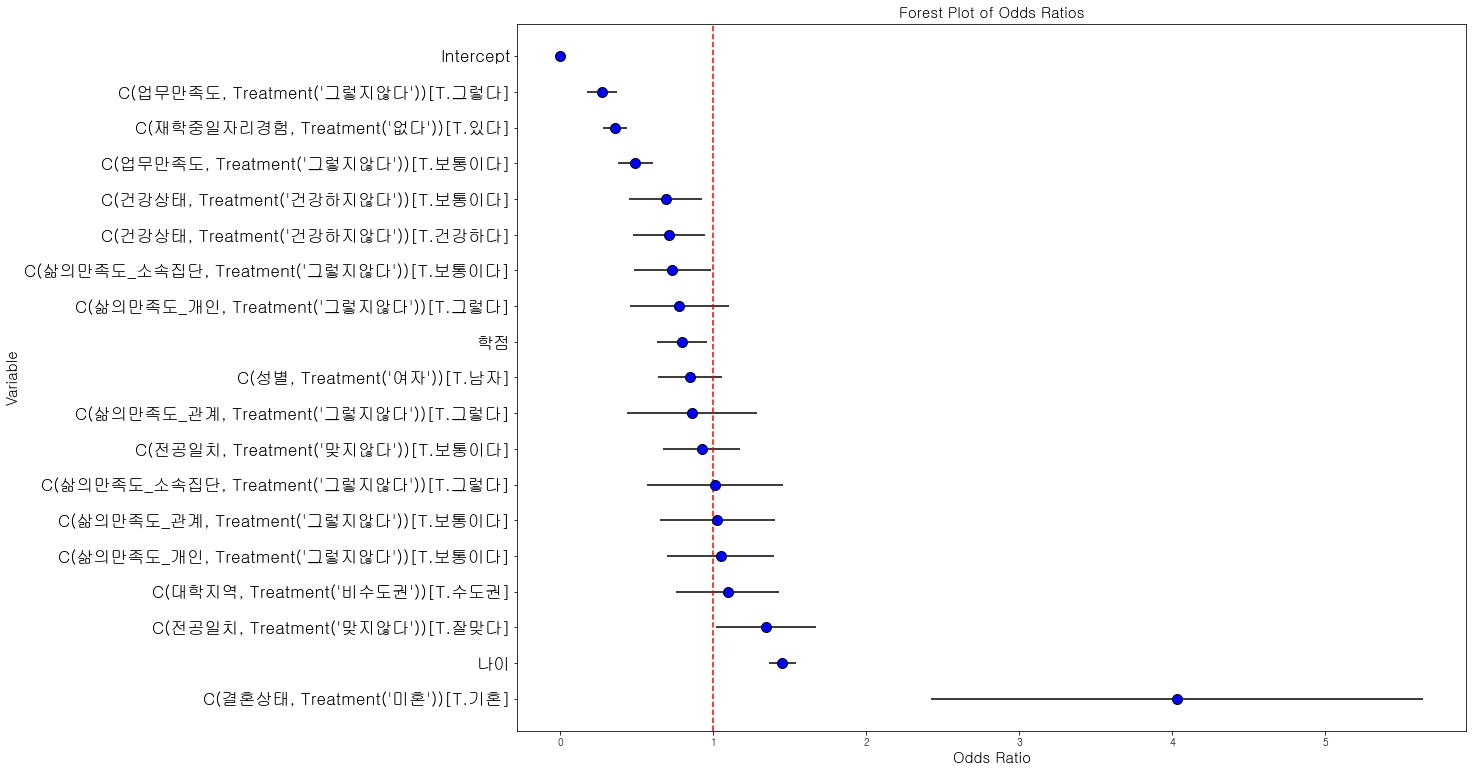

In [15]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in odds_ratios_3.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='o', color='black', 
             markersize=10, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variable', fontsize=15)
plt.title('Forest Plot of Odds Ratios', fontsize=15)

# Show the plot
plt.show()